# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [64]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 621


In [65]:
len(cities)

621

In [66]:
lat_long=list(zip(lats,lngs))
lat_long

[(33.3781381455849, -126.3080396720441),
 (-85.24899895183384, 19.841903252928773),
 (-16.58106617459535, -48.15165822988317),
 (45.92119620097358, -37.43656067069432),
 (-34.87229933098282, -88.63338557050896),
 (-26.90132125877598, -62.09679848593446),
 (38.988890426703136, -13.236599093588893),
 (-84.93310322777137, 94.05196484037748),
 (-33.97376713273746, -74.1009975447543),
 (-56.329011741323335, 7.394566607598591),
 (-11.907182921589026, 8.071251430624358),
 (-87.47340984534208, -124.57565571471397),
 (-76.52102268526023, 61.73363878702318),
 (84.61732587096927, -10.443550751863228),
 (35.993911332676575, 93.22987254226143),
 (39.46033792080706, 46.52661917061798),
 (-3.488645264345621, 42.817231393449816),
 (20.53509167803108, 44.04413261008068),
 (-80.0935818951057, -110.93028625988981),
 (26.90473851855569, 15.216182280486152),
 (33.97224568530363, -3.8612291441019977),
 (-25.93016013516538, 103.35488463424514),
 (-52.228606135933816, 11.505760490467424),
 (9.422895965955561,

In [67]:
latitude_longitude_df = pd.DataFrame(lat_long, columns = ["Latitude","Longitude"])
latitude_longitude_df

,Latitude,Longitude
0,33.378138,-126.308040
1,-85.248999,19.841903
2,-16.581066,-48.151658
3,45.921196,-37.436561
4,-34.872299,-88.633386
...,...,...
1495,-70.596173,20.002115
1496,-64.933481,-118.201294
1497,60.046490,107.862410
1498,-66.067423,18.793069


In [68]:
Cities_df = pd.DataFrame(cities)
Cities_df.columns = ["City"]
Cities_df

,City
0,pacific grove
1,bredasdorp
2,luziania
3,ribeira grande
4,lebu
...,...
616,gedinne
617,zavodouspenskoye
618,meyungs
619,nanning


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [69]:
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

units = "metric"

city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units

city_weather = requests.get(city_url)    # YOUR CODE HERE
response_json = city_weather.json()

response_json


{'coord': {'lon': -175.2, 'lat': -21.2},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 28.09,
  'feels_like': 33.85,
  'temp_min': 28.09,
  'temp_max': 28.09,
  'pressure': 1011,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 3.6, 'deg': 350},
 'clouds': {'all': 40},
 'dt': 1674217197,
 'sys': {'type': 1,
  'id': 7285,
  'country': 'TO',
  'sunrise': 1674321354,
  'sunset': 1674368880},
 'timezone': 46800,
 'id': 4032243,
 'name': 'Vaini',
 'cod': 200}

In [70]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units  # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)    # YOUR CODE HERE
        response_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (response_json["coord"]["lat"]) # YOUR CODE HERE
        city_lng = (response_json["coord"]["lon"]) # YOUR CODE HERE
        city_max_temp = (response_json["main"]["temp_max"]) # YOUR CODE HERE
        city_humidity = (response_json["main"]["humidity"]) # YOUR CODE HERE
        city_clouds = (response_json["clouds"]["all"]) # YOUR CODE HERE
        city_wind = (response_json["wind"]["speed"]) # YOUR CODE HERE
        city_country = (response_json["sys"]["country"]) # YOUR CODE HERE
        city_date = (response_json["dt"]) # YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pacific grove
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | luziania
Processing Record 4 of Set 1 | ribeira grande
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | presidencia roque saenz pena
Processing Record 7 of Set 1 | colares
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | namibe
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 15 of Set 1 | yumen
Processing Record 16 of Set 1 | khndzoresk
Processing Record 17 of Set 1 | lamu
Processing Record 18 of Set 1 | abha
Processing Record 19 of Set 1 | sabha
Processing Record 20 of Set 1 | tawnat
City not found. Skipping...
Processing Record 

In [71]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df =  pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          577
Lat           577
Lng           577
Max Temp      577
Humidity      577
Cloudiness    577
Wind Speed    577
Country       577
Date          577
dtype: int64

In [72]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pacific grove,36.6177,-121.9166,7.23,74,0,3.60,US,1674217197
1,bredasdorp,-34.5322,20.0403,28.14,46,0,7.50,ZA,1674217197
2,luziania,-16.2525,-47.9503,24.83,76,64,1.65,BR,1674217197
3,ribeira grande,38.5167,-28.7000,15.43,82,40,8.94,PT,1674217198
4,lebu,-37.6167,-73.6500,14.01,90,33,1.55,CL,1674216922


In [73]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [74]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,7.23,74,0,3.60,US,1674217197
1,bredasdorp,-34.5322,20.0403,28.14,46,0,7.50,ZA,1674217197
2,luziania,-16.2525,-47.9503,24.83,76,64,1.65,BR,1674217197
3,ribeira grande,38.5167,-28.7000,15.43,82,40,8.94,PT,1674217198
4,lebu,-37.6167,-73.6500,14.01,90,33,1.55,CL,1674216922


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

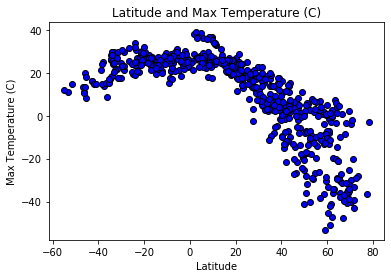

In [75]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x_axis=[city_data_df["Lat"]]
y_axis=[city_data_df["Max Temp"]]


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude and Max Temperature (C)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.gcf

# Save the figure
plt.savefig("output_data/Fig1.png", dpi=100)

# Show plot
plt.show()

#### Latitude Vs. Humidity

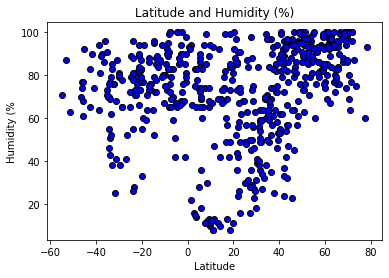

In [76]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_axis=[city_data_df["Lat"]]
y_axis=[city_data_df["Humidity"]]


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude and Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%")
plt.gcf

# Save the figure
plt.savefig("output_data/Fig2.png", dpi=100)

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

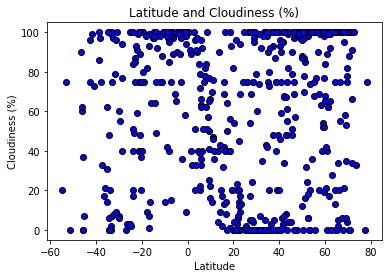

In [77]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE

x_axis=[city_data_df["Lat"]]
y_axis=[city_data_df["Cloudiness"]]


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude and Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.gcf

# Save the figure
plt.savefig("output_data/Fig3.png", dpi=100)

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

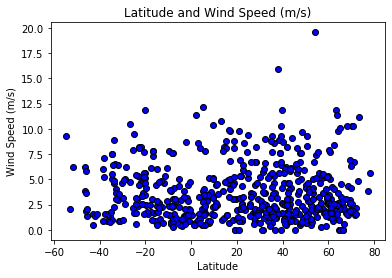

In [78]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE

# Incorporate the other graph properties
# YOUR CODE HERE
x_axis=[city_data_df["Lat"]]
y_axis=[city_data_df["Wind Speed"]]


plt.scatter(x_axis, y_axis, marker="o", facecolors="blue", edgecolors="black")
plt.title("Latitude and Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.gcf

# Save the figure
plt.savefig("output_data/Fig4.png", dpi=100)

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [98]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE

northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0, : ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pacific grove,36.6177,-121.9166,7.23,74,0,3.60,US,1674217197
3,ribeira grande,38.5167,-28.7000,15.43,82,40,8.94,PT,1674217198
6,colares,38.7992,-9.4469,17.41,85,75,7.60,PT,1674217200
7,albany,42.6001,-73.9662,1.52,93,100,1.08,US,1674217200
12,yumen,40.2833,97.2000,-9.45,53,93,8.70,CN,1674217202


In [99]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0, : ]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,28.14,46,0,7.50,ZA,1674217197
2,luziania,-16.2525,-47.9503,24.83,76,64,1.65,BR,1674217197
4,lebu,-37.6167,-73.6500,14.01,90,33,1.55,CL,1674216922
5,presidencia roque saenz pena,-26.7852,-60.4388,31.80,41,0,4.69,AR,1674217199
8,constitucion,-35.3333,-72.4167,16.06,73,62,1.34,CL,1674217200


###  Temperature vs. Latitude Linear Regression Plot

In [100]:
Northern_lat = northern_hemi_df.iloc[:,1]
Northern_max_temp = northern_hemi_df.iloc[:,3]
correlation = st.pearsonr(Northern_lat,Northern_max_temp)
print(f"The correlation between North Hemisphere Latitude and Max Temperature (C) is {round(correlation[0],2)}")

The correlation between North Hemisphere Latitude and Max Temperature (C) is -0.85


The r-squared is: 0.7143842653404553


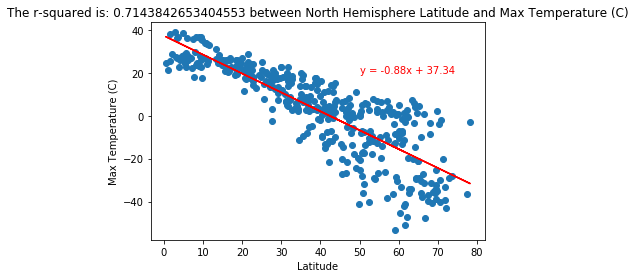

In [101]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = (Northern_lat)
y_values = (Northern_max_temp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"The r-squared is: {rvalue**2} between North Hemisphere Latitude and Max Temperature (C)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig5.png", dpi=100)
plt.show()

In [102]:
Southern_lat = southern_hemi_df.iloc[:,1]
Southern_max_temp = southern_hemi_df.iloc[:,3]
correlation = st.pearsonr(Southern_lat,Southern_max_temp)
print(f"The correlation between Southern Hemisphere Latitude and Max Temperature (C) is {round(correlation[0],2)}")

The correlation between Southern Hemisphere Latitude and Max Temperature (C) is 0.5


The r-squared is: 0.2524701544605756


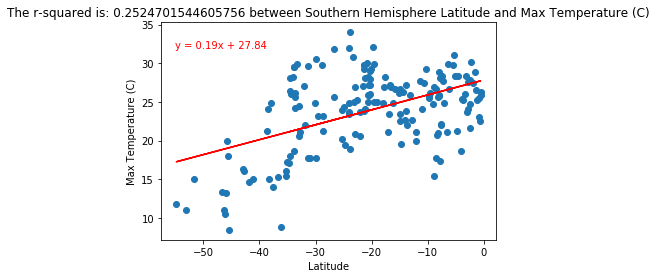

In [103]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = (Southern_lat)
y_values = (Southern_max_temp)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,32),color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"The r-squared is: {rvalue**2} between Southern Hemisphere Latitude and Max Temperature (C)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig6.png", dpi=100)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared between North Hemisphere Latitude and Max Temperature (C) is: 0.7143842653404553. This value indicates that about ~71% of the values for the dependent variable, Max Temperature (C), are close to the regression line, showing a strong correlation i.e. as latitude increases North of the equator, Max Temperature decreases, which is an expected relationship.

The r-squared between Southern Hemisphere Latitude and Max Temperature (C) is: 0.2524701544605756. This value indicates that about ~25% of the values for the dependent variable, Max Temperature (C), are close to the regression line, showing a small correlation i.e. as latitude increases South of the equator, Max Temperature decreases, which is an expected relationship.

### Humidity vs. Latitude Linear Regression Plot

In [104]:
Northern_lat = northern_hemi_df.iloc[:,1]
Northern_humidity = northern_hemi_df.iloc[:,4]
correlation = st.pearsonr(Northern_lat,Northern_humidity)
print(f"The correlation between North Hemisphere Latitude and Humidity (%) is {round(correlation[0],2)}")

The correlation between North Hemisphere Latitude and Humidity (%) is 0.49


The r-squared is: 0.23974447029578033


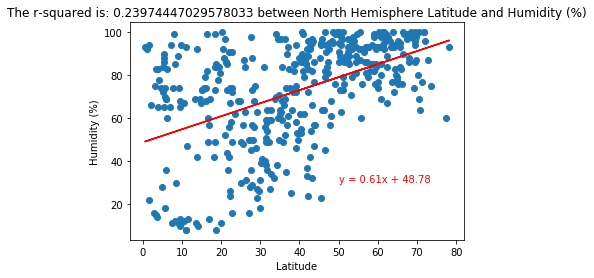

In [105]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = (Northern_lat)
y_values = (Northern_humidity)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,30),color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"The r-squared is: {rvalue**2} between North Hemisphere Latitude and Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig7.png", dpi=100)
plt.show()

In [106]:
Southern_lat = southern_hemi_df.iloc[:,1]
Southern_humidity = southern_hemi_df.iloc[:,4]
correlation = st.pearsonr(Southern_lat,Southern_humidity)
print(f"The correlation between Southern Hemisphere Latitude and Humidity (%) is {round(correlation[0],2)}")

The correlation between Southern Hemisphere Latitude and Humidity (%) is 0.19


The r-squared is: 0.0377121960940227


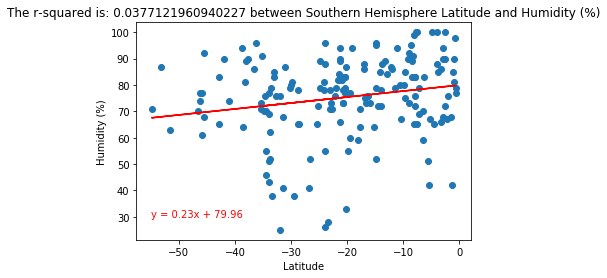

In [107]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = (Southern_lat)
y_values = (Southern_humidity)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,30),color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"The r-squared is: {rvalue**2} between Southern Hemisphere Latitude and Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig8.png", dpi=100)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared between North Hemisphere Latitude and Humidity (%) is: 0.23974447029578033. This value indicates that about ~24% of the values for the dependent variable, Humidity (%), are close to the regression line, showing a small correlation i.e. as latitude increases North of the equator, Humidity (%) increases. This was not what i would have expected as one would have thought there would be higher humidity near the equator.

The r-squared between Southern Hemisphere Latitude and Humidity (%) is: 0.0377121960940227. This value indicates that about ~4% of the values for the dependent variable, Humidity (%), are close to the regression line, showing a very wek correlation i.e. that as latitude increases South of the equator, Humidity (%) decreases. This is an expected relationship as one would expect there to be higher humidity near the equator.

### Cloudiness vs. Latitude Linear Regression Plot

In [108]:
Northern_lat = northern_hemi_df.iloc[:,1]
Northern_cloudiness = northern_hemi_df.iloc[:,5]
correlation = st.pearsonr(Northern_lat,Northern_cloudiness)
print(f"The correlation between North Hemisphere Latitude and Cloudiness (%) is {round(correlation[0],2)}")

The correlation between North Hemisphere Latitude and Cloudiness (%) is 0.18


The r-squared is: 0.034000362157100686


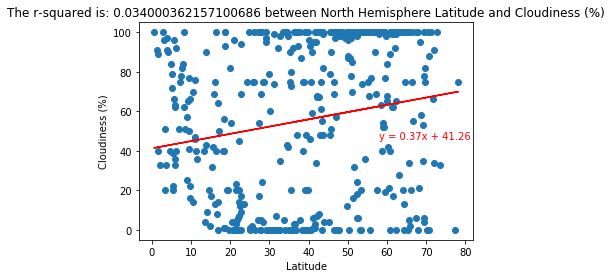

In [109]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = (Northern_lat)
y_values = (Northern_cloudiness)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(58,46),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"The r-squared is: {rvalue**2} between North Hemisphere Latitude and Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig7.png", dpi=100)
plt.show()

In [110]:
Southern_lat = southern_hemi_df.iloc[:,1]
Southern_cloudiness = southern_hemi_df.iloc[:,5]
correlation = st.pearsonr(Southern_lat,Southern_cloudiness)
print(f"The correlation between Southern Hemisphere Latitude and Cloudiness (%) is {round(correlation[0],2)}")

The correlation between Southern Hemisphere Latitude and Cloudiness (%) is 0.43


The r-squared is: 0.18753173688897398


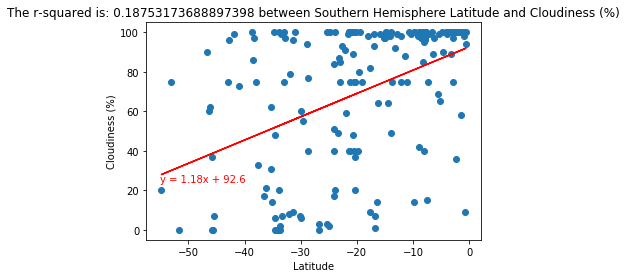

In [111]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = (Southern_lat)
y_values = (Southern_cloudiness)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,24),color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"The r-squared is: {rvalue**2} between Southern Hemisphere Latitude and Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig8.png", dpi=100)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared between North Hemisphere Latitude and Cloudiness (%) is: 0.034000362157100686. This value indicates that about ~3% of the values for the dependent variable, Cloudiness (%), are close to the regression line, showing a very weks correlation i.e. as latitude increases North of the equator, Cloudiness (%) increases. 

The r-squared between Southern Hemisphere Latitude and Cloudiness (%) is: 0.18753173688897398. This value indicates that about ~19% of the values for the dependent variable, Cloudiness (%), are close to the regression line, showing a small correlation i.e. as latitude increases South of the equator, Cloudiness (%) decreases. 

### Wind Speed vs. Latitude Linear Regression Plot

In [112]:
Northern_lat = northern_hemi_df.iloc[:,1]
Northern_wind_speed = northern_hemi_df.iloc[:,6]
correlation = st.pearsonr(Northern_lat,Northern_wind_speed)
print(f"The correlation between North Hemisphere Latitude and Wind Speed (m/s) is {round(correlation[0],2)}")

The correlation between North Hemisphere Latitude and Wind Speed (m/s) is 0.01


The r-squared is: 4.916231650054034e-05


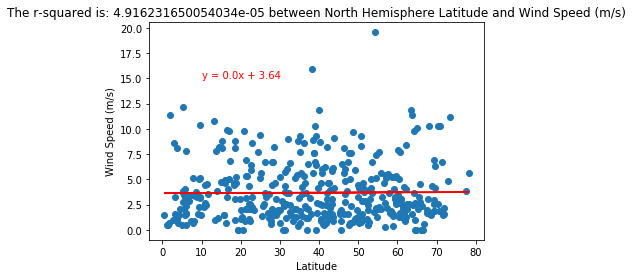

In [113]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = (Northern_lat)
y_values = (Northern_wind_speed)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"The r-squared is: {rvalue**2} between North Hemisphere Latitude and Wind Speed (m/s)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig9.png", dpi=100)
plt.show()

In [114]:
Southern_lat = southern_hemi_df.iloc[:,1]
Southern_wind_speed = southern_hemi_df.iloc[:,6]
correlation = st.pearsonr(Southern_lat,Southern_wind_speed)
print(f"The correlation between Southern Hemisphere Latitude and Wind Speed (m/s) is {round(correlation[0],2)}")

The correlation between Southern Hemisphere Latitude and Wind Speed (m/s) is -0.21


The r-squared is: 0.04273471151129801


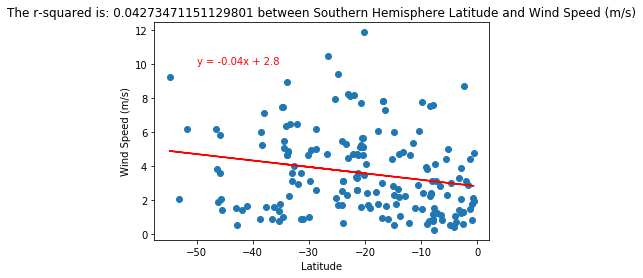

In [115]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = (Southern_lat)
y_values = (Southern_wind_speed)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"The r-squared is: {rvalue**2} between Southern Hemisphere Latitude and Wind Speed (m/s)")
print(f"The r-squared is: {rvalue**2}")
plt.gcf
plt.savefig("output_data/Fig10.png", dpi=500)
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The r-squared between North Hemisphere Latitude and Wind Speed (m/s) is: 4.916231650054034e-05. I am concerned there may be something wrong with the data or scipt for calculating r squared, due to the e-05 at the end of the value and it being greater than 1. 

The r-squared between Southern Hemisphere Latitude and Wind Speed (m/s) is: 0.04273471151129801. This value indicates that about ~4% of the values for the dependent variable, Wind Speed (m/s), are close to the regression line, showing a very weak correlation i.e. that as latitude increases South of the equator, Wind Speed (m/s) increases. 